<a href="https://colab.research.google.com/github/ads-22/Moulded-Fingerprint-Detection/blob/main/minor_final_1911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Minor Project
### Finger Print Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install -q kaggle

In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download ruizgara/socofing

socofing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
! unzip socofing

Streaming output truncated to the last 5000 lines.
  inflating: socofing/SOCOFing/Real/191__F_Left_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_ring_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_thumb_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_ring_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_thumb_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_ring_finger.BMP  
  i

In [9]:
import numpy as np
import pandas as pd

In [10]:
def extract_label(img_path,train = True):
  
  if img_path[29] == 'A':
    c=0 
  else:
    c = 1

  return np.array([c], dtype=np.uint16)

In [11]:
import cv2
img_size = 96

def loading_data(path,train):
    print("loading data from: ",path)
    data = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),train)
            data.append([label[0], img_resize ])
        except Exception as e:
            pass
    #data
    return data

In [12]:
import os

In [13]:
Real_path = "../content/socofing/SOCOFing/Real"
Easy_path = "../content/socofing/SOCOFing/Altered/Altered-Easy"
Medium_path = "../content/socofing/SOCOFing/Altered/Altered-Medium"
Hard_path = "../content/socofing/SOCOFing/Altered/Altered-Hard"

Real_data = loading_data(Real_path, train = True)
Easy_data = loading_data(Easy_path, train = True)
Medium_data = loading_data(Medium_path, train = True)
Hard_data = loading_data(Hard_path, train = True)
#test = loading_data(Real_path, train = False)

data = np.concatenate([Real_data,Easy_data, Medium_data, Hard_data], axis=0)

loading data from:  ../content/socofing/SOCOFing/Real
loading data from:  ../content/socofing/SOCOFing/Altered/Altered-Easy
loading data from:  ../content/socofing/SOCOFing/Altered/Altered-Medium
loading data from:  ../content/socofing/SOCOFing/Altered/Altered-Hard


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
#del Easy_data, Medium_data, Hard_data, Real_data

In [14]:
import random
random.shuffle(data)
#random.shuffle(test)

In [15]:
r=0.8*(len(data))
train=data[:int(r)]
test=data[int(r):]


In [16]:
print(len(test))

11054


In [17]:
img, labels = [], []
for label, feature in train:
    labels.append(label)
    img.append(feature)
train_data = np.array(img).reshape(-1, img_size, img_size, 1)
train_data = train_data / 255.0


In [18]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(labels, num_classes = 2)

In [19]:
img, labels = [], []
for label, feature in test:
    labels.append(label)
    img.append(feature)
test_data = np.array(img).reshape(-1, img_size, img_size, 1)
test_data = test_data / 255.0

In [20]:
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(labels, num_classes = 2)

In [ ]:
#del train, data,test

## Model

In [21]:
print(len(train_labels))

44216


In [23]:
from keras.layers import *
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(20,(3,3), padding='same',activation='relu',input_shape=(96,96,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(40,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(60,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2))) 
model.add(Conv2D(80,(3,3),padding='same',activation='relu'))

model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 20)        200       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 20)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 40)        7240      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 40)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 60)        21660     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 60)      

In [24]:
from keras import optimizers
sgd = tf.optimizers.SGD(learning_rate=0.01)

In [25]:
print(test_labels.shape)

(11054, 2)


In [26]:
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
#early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_data,train_labels, batch_size = 70, epochs = 100,  verbose = 1)#callbacks = [early_stopping_cb],

Epoch 1/100
632/632 [==============================] - 55s 40ms/step - loss: 0.6548 - accuracy: 0.6120
Epoch 2/100
632/632 [==============================] - 25s 39ms/step - loss: 0.5487 - accuracy: 0.7098
Epoch 3/100
632/632 [==============================] - 25s 39ms/step - loss: 0.4597 - accuracy: 0.7708
Epoch 4/100
632/632 [==============================] - 25s 39ms/step - loss: 0.3781 - accuracy: 0.8272
Epoch 5/100
632/632 [==============================] - 25s 39ms/step - loss: 0.2786 - accuracy: 0.8823
Epoch 6/100
632/632 [==============================] - 25s 39ms/step - loss: 0.2468 - accuracy: 0.9069
Epoch 7/100
632/632 [==============================] - 25s 39ms/step - loss: 0.1603 - accuracy: 0.9361
Epoch 8/100
632/632 [==============================] - 25s 39ms/step - loss: 0.1651 - accuracy: 0.9420
Epoch 9/100
632/632 [==============================] - 24s 39ms/step - loss: 0.1228 - accuracy: 0.9524
Epoch 10/100
632/632 [==============================] - 24s 39ms/step - l

In [33]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)
 
# Load the pickled model
from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
from_pickle.predict(test_data)

INFO:tensorflow:Assets written to: ram://eaca6b59-41bf-4d96-bb46-0561e2d0b751/assets


array([[1.0000000e+00, 1.0012019e-12],
       [1.0000000e+00, 9.6032415e-14],
       [1.0000000e+00, 3.2755174e-11],
       ...,
       [1.0000000e+00, 1.3236042e-13],
       [1.0000000e+00, 1.7713132e-09],
       [1.0000000e+00, 5.7924905e-13]], dtype=float32)

In [34]:
model.evaluate(test_data, test_labels)

346/346 [==============================] - 4s 12ms/step - loss: 0.0234 - accuracy: 0.9939


[0.023423219099640846, 0.9939388632774353]

In [37]:
model.save_weights("model.h5")

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

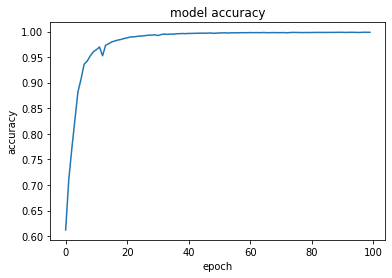

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

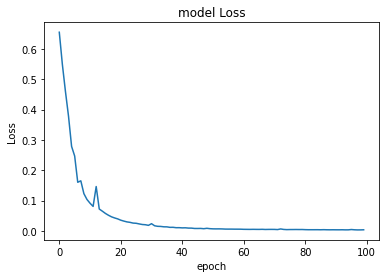

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()